1. Implement a function to perform rotation on a given image by a specified angle
(in degrees).
2. Apply the rotation function to a set of images with varying rotation angles (e.g.,
30°, 60°, -45°) and visualize the results.
3. Compare the results of your rotation implementation with a built-in rotation
function from a popular image processing library (e.g., OpenCV). Discuss any
differences or similarities observed.

index 0 1 2
index 1 3 4
index 2 5 6
index 3 7 8


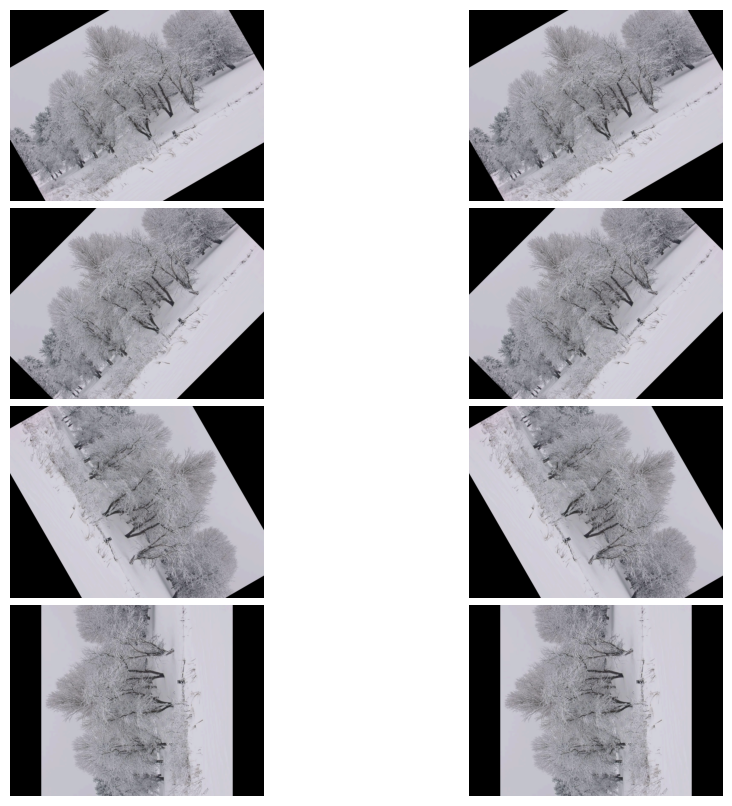

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def loadImage(imagePath):
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


def rotate(cvImage, rotationAngle):
    height, width = cvImage.shape[:2]
    centerX, centerY = (width // 2, height // 2)
    M = cv2.getRotationMatrix2D((centerX, centerY), rotationAngle, 1.0)
    rotated = cv2.warpAffine(cvImage, M, (width, height))
    return rotated

def rotateImageCustom(image, angle):
    # Convert angle to radians
    angle_rad = np.deg2rad(angle)
    cos_val = np.cos(angle_rad)
    sin_val = np.sin(angle_rad)

    h, w = image.shape[:2]
    
    cx, cy = w // 2, h // 2

    # Output image size (bounding box)
    new_w = int(abs(w * cos_val) + abs(h * sin_val))
    new_h = int(abs(h * cos_val) + abs(w * sin_val))

    # Create the output image
    rotated_image = np.zeros((new_h, new_w, 3), dtype=image.dtype)

    # Center of new image
    new_cx, new_cy = new_w // 2, new_h // 2

    for y in range(new_h):
        for x in range(new_w):
            # Coordinate from original image
            xt = (x - new_cx)
            yt = (y - new_cy)

            orig_x = int(cos_val * xt - sin_val * yt + cx)
            orig_y = int(sin_val * xt + cos_val * yt + cy)

            if 0 <= orig_x < w and 0 <= orig_y < h:
                rotated_image[y, x] = image[orig_y, orig_x]

    return rotated_image


listAngle = [30, 45, -60, 90]
cvImageLoaded = loadImage('data/forest.png')
plt.figure(figsize=(12, 8))
for i, rotationAngle in enumerate(listAngle):
    rotatedImage = rotate(cvImageLoaded, rotationAngle)   
    rotatedImageCustom = rotateImageCustom(cvImageLoaded, rotationAngle)
    
    plt.subplot(4, 2, 2* i + 1)
    plt.imshow(rotatedImage)
    plt.axis('off')
    plt.subplot(4, 2, 2* i + 2)
    plt.imshow(rotatedImage)
    plt.axis('off')

plt.subplots_adjust(hspace=0.2, wspace=0.05)
plt.tight_layout(pad=0.5) 
plt.show()